#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline      import Pipeline
from sklearn.impute        import SimpleImputer

from sklearn.model_selection  import train_test_split

#### Helper Functions

In [22]:
def plot_auc_and_confusion_matrix(y_true_train, y_pred_proba_train, y_pred_train, y_true_test, y_pred_proba_test, y_pred_test):
    # Calculate AUC for Training
    auc_train = roc_auc_score(y_true_train, y_pred_proba_train)
    # Calculate AUC for Test
    auc_test = roc_auc_score(y_true_test, y_pred_proba_test)
    
    # Print AUC Scores
    print(f"Training AUC: {auc_train:.2f}")
    print(f"Test AUC: {auc_test:.2f}")
    
    # Plot Confusion Matrices
    plt.figure(figsize=(15, 5))
    
    # Confusion Matrix for Training
    plt.subplot(1, 2, 1)
    cm_train = confusion_matrix(y_true_train, y_pred_train)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(ax=plt.gca(), cmap='Blues')
    plt.title('Training Confusion Matrix')

    # Confusion Matrix for Test
    plt.subplot(1, 2, 2)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(ax=plt.gca(), cmap='Blues')
    plt.title('Test Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Print Classificat

In [4]:
# Import data

df = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/main/bank_churn_dataset.csv')

In [5]:
df.head(2)

,Unnamed: 0,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0,1,3135,66,Male,0.0,self_employed,187.0,2,755,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,1,2,310,35,Male,0.0,self_employed,NaN,2,3214,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
# Target Feature Vs Input Features

X = df.drop(columns=['churn'])
y = df['churn']

In [8]:
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
numeric_features     = X.select_dtypes(include=['int64','float64']).columns.tolist()


In [9]:
numeric_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', StandardScaler())
                                    ])

# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                ])

# Combine preprocessing for both types of data
preprocessor = ColumnTransformer(
                                transformers=[
                                    ('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)
                                ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

numeric_feature_names = numeric_features  # These are directly used without modification
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)
X_processed_df    = pd.DataFrame(X_processed, columns=all_feature_names) # Convert the transformed data back to a DataFrame

X_processed_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
X_processed_df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_balance,gender_Female,gender_Male,gender_missing,occupation_company,occupation_missing,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-1.731304,0.478644,0.999147,-0.330877,-1.429857,-0.341489,-0.182318,1.927027,-0.139017,-0.141953,...,-0.142265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.731190,-1.275909,-0.741756,-0.330877,0.086278,-0.341489,2.439824,-0.066312,-0.046720,0.028425,...,0.030459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.730961,-0.005178,-0.966389,-0.330877,-1.525933,-0.341489,-0.943689,-0.430947,-0.081398,-0.039514,...,-0.057152,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.730847,-1.171568,2.346943,-0.330877,0.522137,-0.341489,-0.366796,0.991130,-0.119457,-0.122361,...,-0.137290,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.730733,0.103512,-0.348649,1.756001,1.632875,1.172672,-0.573667,-0.090621,-0.151482,-0.143293,...,-0.137116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#### Voting Classifier

A voting classifier combines several models and predicts based on the majority vote (hard voting) or the average predicted probabilities (soft voting).

Training AUC: 1.00
Test AUC: 0.78


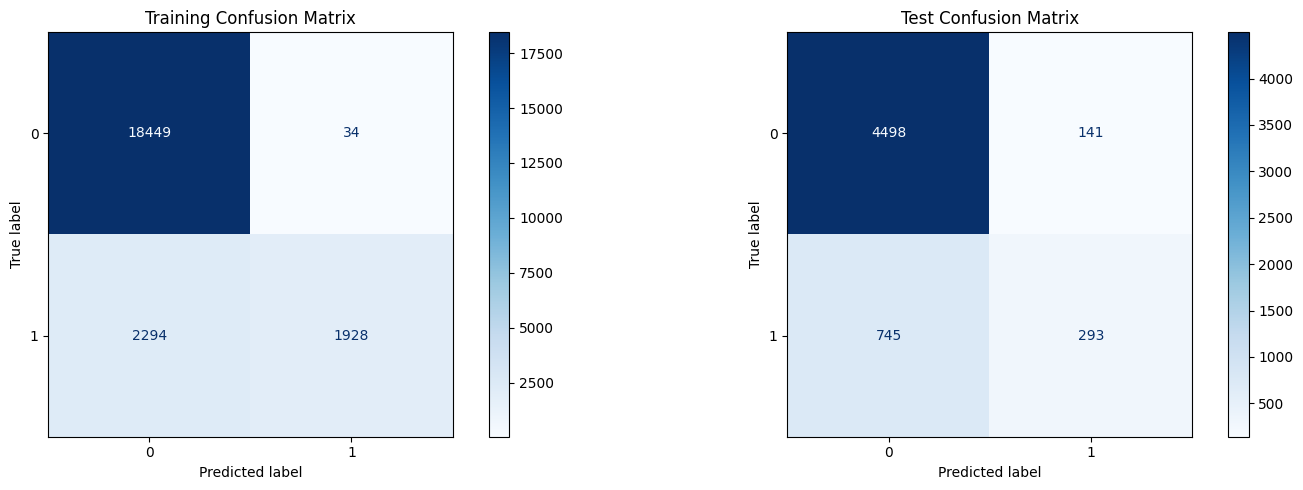

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define base models
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)  # SVC needs probability=True for soft voting
tree_clf = DecisionTreeClassifier()

# Define the voting classifier (soft voting here)
voting_clf = VotingClassifier(
                                estimators=[('lr', log_clf), ('svc', svc_clf), ('tree', tree_clf)],
                                voting='soft'  # Use 'hard' for majority voting, 'soft' for averaging probabilities
                            )

# Train the model
voting_clf.fit(X_train, y_train)

# Training predictions
y_pred_votting_train   = voting_clf.predict(X_train)
y_proba_voting_train        = voting_clf.predict_proba(X_train)[:, 1]

 # Test predictions
y_pred_votting_test   = voting_clf.predict(X_test)
y_proba_votting_test  = voting_clf.predict_proba(X_test)[:, 1]



plot_auc_and_confusion_matrix(y_train, y_proba_voting_train, y_pred_votting_train, y_test, y_proba_votting_test, y_pred_votting_test)



#### 2.Bagging and Pasting
Bagging involves training the same model on different subsets of the data (with replacement), while pasting trains on subsets without replacement.

Training AUC: 1.00
Test AUC: 0.78


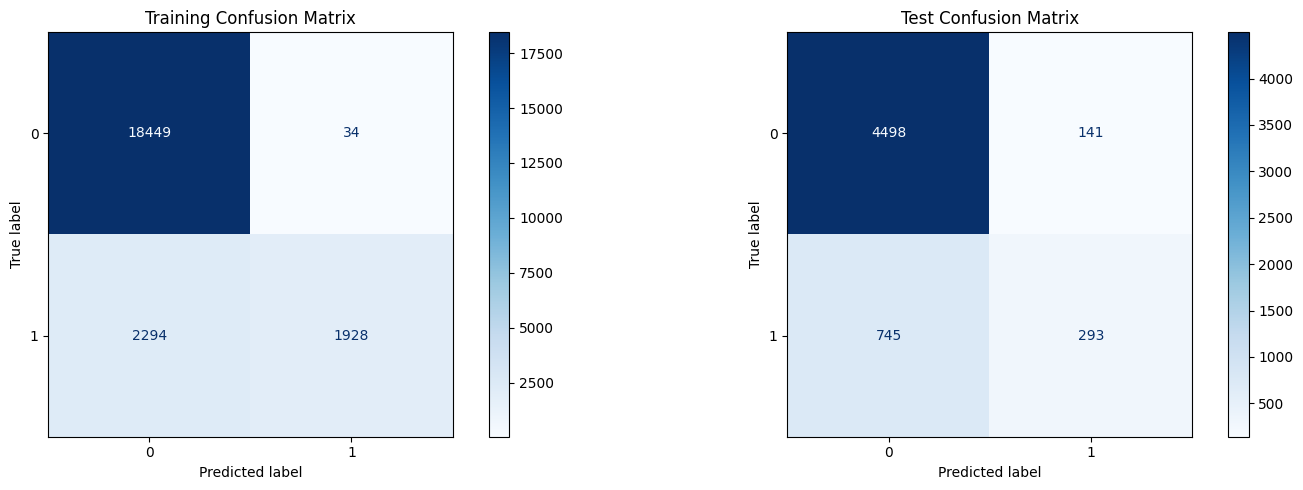

In [25]:
from sklearn.ensemble import BaggingClassifier

# Bagging with replacement
bagging_clf = BaggingClassifier(
                        estimator=DecisionTreeClassifier(),
                        n_estimators=100,  # Number of trees
                        max_samples=0.8,  # Use 80% of the training data
                        bootstrap=True,  # Enable bagging (sampling with replacement)
                        n_jobs=-1,  # Use all processors
                        random_state=42
                    )

# Pasting (sampling without replacement)
pasting_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=False,  # Disable bagging for pasting
    n_jobs=-1,
    random_state=42
)

# Train Bagging classifier
bagging_clf.fit(X_train, y_train)


y_pred_bagging   = bagging_clf.predict(X_train)
y_proba_bagging = bagging_clf.predict_proba(X_train)[:, 1]



# Training predictions
y_pred_bagging_train    = bagging_clf.predict(X_train)
y_proba_bagging_train   = bagging_clf.predict_proba(X_train)[:, 1]

 # Test predictions
y_pred_bagging_test   = bagging_clf.predict(X_test)
y_proba_bagging_test  = bagging_clf.predict_proba(X_test)[:, 1]


plot_auc_and_confusion_matrix(y_train, y_proba_voting_train, y_pred_votting_train, y_test, y_proba_votting_test, y_pred_votting_test)




Training AUC: 1.00
Test AUC: 0.83


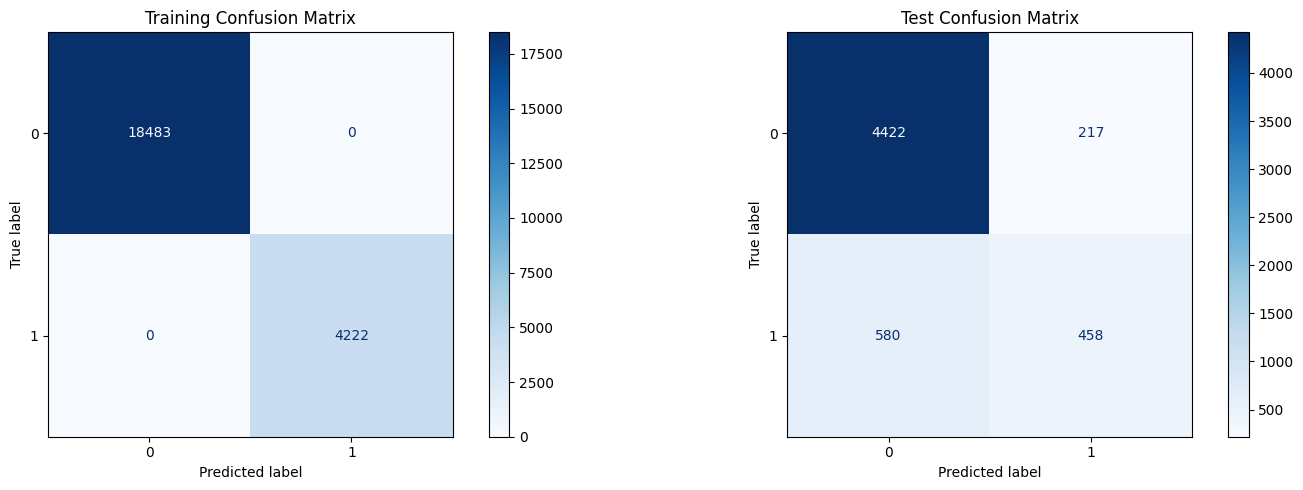

In [26]:

# Train Pasting classifier
pasting_clf.fit(X_train, y_train)
y_pred_pasting  = pasting_clf.predict(X_train)
y_proba_pasting = pasting_clf.predict_proba(X_train)[:, 1]



# Training predictions
y_pred_pasting_train    = pasting_clf.predict(X_train)
y_proba_pasting_train   = pasting_clf.predict_proba(X_train)[:, 1]

 # Test predictions
y_pred_pasting_test   = pasting_clf.predict(X_test)
y_proba_pasting_test  = pasting_clf.predict_proba(X_test)[:, 1]


plot_auc_and_confusion_matrix(y_train, y_proba_pasting_train, y_pred_pasting_train, y_test, y_proba_pasting_test, y_pred_pasting_test)


#### Random Forests
Random forests are an ensemble of decision trees trained on different subsets of the data and feature subsets.

Training AUC: 1.00
Test AUC: 0.84


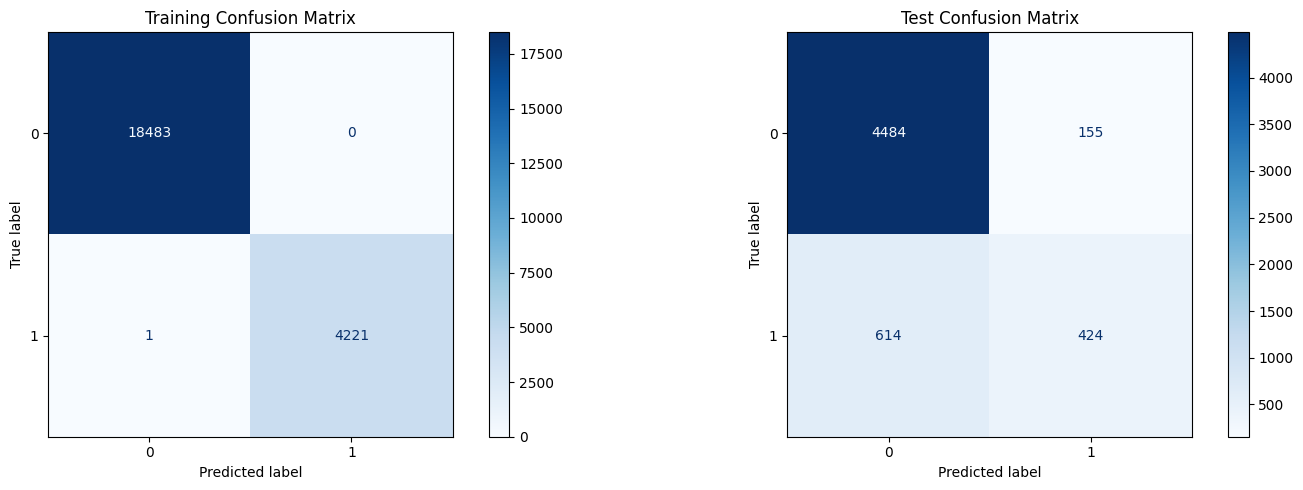

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
rf_clf = RandomForestClassifier(
                                    n_estimators=100,  # Number of trees
                                    max_features='sqrt',  # Randomly choose sqrt(number of features) for each tree
                                    n_jobs=-1,
                                    random_state=42
                                )

# Train the model
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf  = rf_clf.predict(X_train)
y_proba_rf = rf_clf.predict_proba(X_train)[:, 1]


# Training predictions
y_pred_randomf_train    = rf_clf.predict(X_train)
y_proba_randomf_train   = rf_clf.predict_proba(X_train)[:, 1]

 # Test predictions
y_pred_randomf_test   = rf_clf.predict(X_test)
y_proba_randomf_test  = rf_clf.predict_proba(X_test)[:, 1]


plot_auc_and_confusion_matrix(y_train, y_proba_randomf_train, y_pred_randomf_train, y_test, y_proba_randomf_test, y_pred_randomf_test)


#### Boosting
Boosting trains models sequentially, each correcting the errors of the previous model. Common boosting methods include AdaBoost and Gradient Boosting

c:\Users\Lbundi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training AUC: 0.86
Test AUC: 0.82


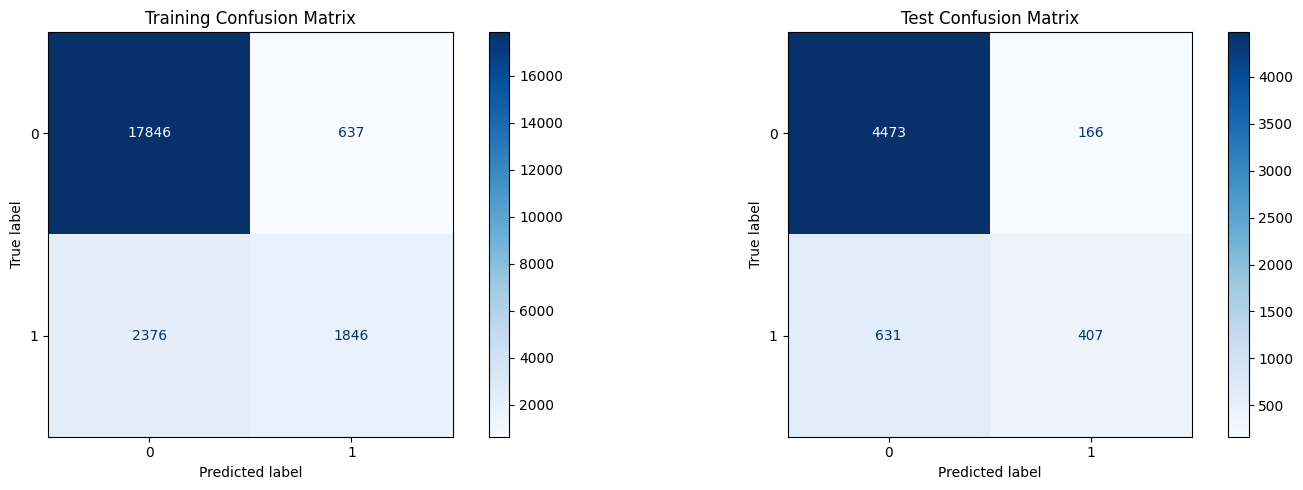

In [28]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost classifier
ada_clf = AdaBoostClassifier(
                                estimator=DecisionTreeClassifier(max_depth=1),
                                n_estimators=1000,
                                learning_rate=0.5,
                                random_state=42
                            )

# Train the model
ada_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_ada = ada_clf.predict(X_train)
y_proba_ada = ada_clf.predict_proba(X_train)[:, 1]


# Training predictions
y_pred_adaclf_train    = ada_clf.predict(X_train)
y_proba_adaclf_train   = ada_clf.predict_proba(X_train)[:, 1]

 # Test predictions
y_pred_adaclf_test   = ada_clf.predict(X_test)
y_proba_adaclf_test  = ada_clf.predict_proba(X_test)[:, 1]


plot_auc_and_confusion_matrix(y_train, y_proba_adaclf_train, y_pred_adaclf_train, y_test, y_proba_adaclf_test, y_pred_adaclf_test)


Training AUC: 0.86
Test AUC: 0.84


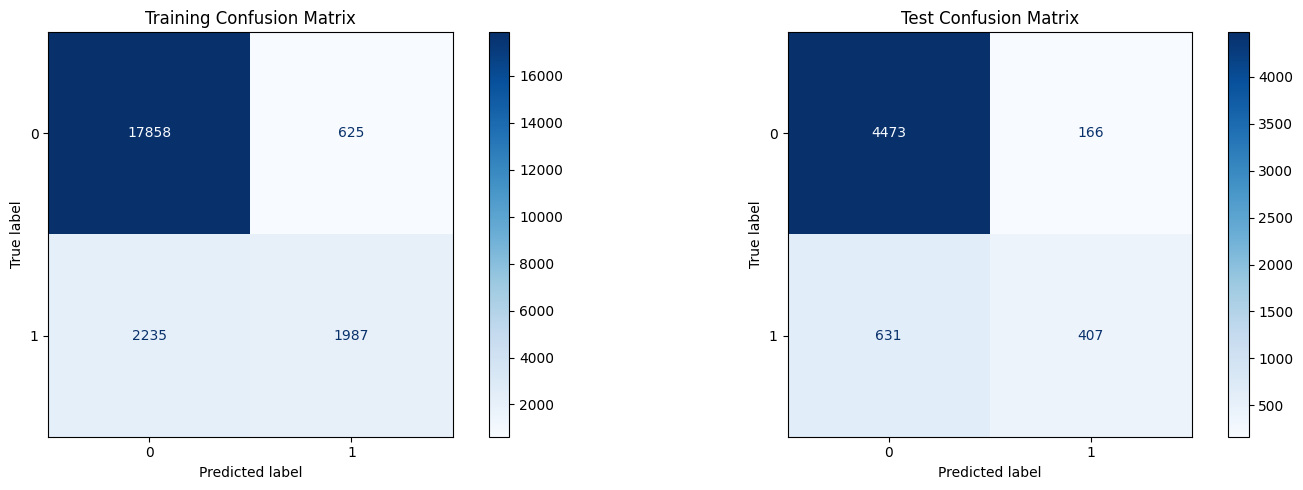

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_clf.predict(X_train)
y_proba_gb = gb_clf.predict_proba(X_train)[:, 1]



# Training predictions
y_pred_gb_clf_train    = gb_clf.predict(X_train)
y_proba_gb_clf_train   = gb_clf.predict_proba(X_train)[:, 1]

 # Test predictions
y_pred_gb_clf_test   = ada_clf.predict(X_test)
y_proba_gb_clf_test  = gb_clf.predict_proba(X_test)[:, 1]


plot_auc_and_confusion_matrix(y_train, y_proba_gb_clf_train, y_pred_gb_clf_train, y_test, y_proba_gb_clf_test, y_pred_gb_clf_test)



In [ ]:
# Putting everything together

# Define and train models
models = {
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ),
    "Pasting": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,
        bootstrap=False,
        n_jobs=-1,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=0.5,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...\n")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Training predictions
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    
    # Test predictions
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Check for overfitting
    plot_auc_and_confusion_matrix(y_train, y_proba_train, y_pred_train, y_test, y_proba_test, y_pred_test)
